In [2]:
%load_ext dotenv
%dotenv
import os

SN_API_HOST = os.getenv('SN_API_HOST')
SN_API_KEY = os.getenv('SN_API_KEY')

In [3]:
from signals_notebook.api import SignalsNotebookApi
SignalsNotebookApi.init(SN_API_HOST, SN_API_KEY)

In [4]:
from signals_notebook.entities.chemical_drawing import ChemicalDrawingPosition
from signals_notebook.entities import EntityStore

chemical_drawing_to_update = EntityStore.get("chemicalDrawing:7730befb-3ed5-4625-a1d0-e43c1f67c8c5")

reactants = chemical_drawing_to_update.get_structures(positions=ChemicalDrawingPosition.REACTANTS)
products = chemical_drawing_to_update.get_structures(positions=ChemicalDrawingPosition.PRODUCTS)
reagents = chemical_drawing_to_update.get_structures(positions=ChemicalDrawingPosition.REAGENTS)

for reactant in reactants:
    chemical_drawing_to_update.add_structures(structure=reactant, positions=ChemicalDrawingPosition.REACTANTS)
for product in products:
    chemical_drawing_to_update.add_structures(structure=product, positions=ChemicalDrawingPosition.PRODUCTS)
for reagent in reagents:
    chemical_drawing_to_update.add_structures(structure=reagent, positions=ChemicalDrawingPosition.REAGENTS)

In [8]:
from signals_notebook.entities import EntityStore
experiment = EntityStore.get("experiment:a16616ef-e1d5-4409-a9b6-c253c359d504")
chemical_drawing = chemical_drawing_to_update

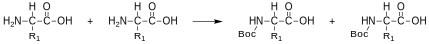

In [9]:
from IPython.display import SVG
from signals_notebook.entities import ChemicalDrawingFormat

svg_file = chemical_drawing.get_content(format=ChemicalDrawingFormat.SVG)
SVG(data=svg_file.content)

In [10]:
smiles_file = chemical_drawing.get_content(format=ChemicalDrawingFormat.SMILES)
print(smiles_file.content.decode('utf-8'))


NC([R1])([H])C(O)=O.NC([R1])([H])C(O)=O>>[R1]C(C(O)=O)([H])NC(OC(C)(C)C)=O.[R1]C(C(O)=O)([H])NC(OC(C)(C)C)=O


In [11]:
mol_file = chemical_drawing.get_content(format=ChemicalDrawingFormat.MOL)
print(mol_file.content.decode('utf-8'))



  ChemDraw08302210312D

 42 38  0  0  0  0  0  0  0  0999 V2000
   -5.3496    0.6566    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5246    0.6566    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6990    0.6566    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5246   -0.1684    0.0000 R1  0  0  0  0  0  0  0  0  0  0  0  0
   -2.8740    0.6566    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6990    1.4816    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5246    1.4816    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  -11.3830    0.6566    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  -10.5580    0.6566    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -9.7330    0.6566    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -10.5580   -0.1684    0.0000 R1  0  0  0  0  0  0  0  0  0  0  0  0
   -8.9080    0.6566    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -9.7330    1.4816    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  -10.5580    1.4816    0

In [12]:
cdxml_file = chemical_drawing.get_content(format=ChemicalDrawingFormat.CDXML)
print(cdxml_file.content.decode('utf-8'))

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE CDXML SYSTEM "http://www.cambridgesoft.com/xml/cdxml.dtd" >
<CDXML
 CreationProgram="ChemDrawSDK 21.0.4.0"
 BoundingBox="50 50 473.43 89.09"
 WindowPosition="0 0"
 WindowSize="0 0"
 FractionalWidths="yes"
 InterpretChemically="yes"
 ShowAtomQuery="yes"
 ShowAtomStereo="no"
 ShowAtomEnhancedStereo="yes"
 ShowAtomNumber="no"
 ShowResidueID="no"
 ShowBondQuery="yes"
 ShowBondRxn="yes"
 ShowBondStereo="no"
 ShowTerminalCarbonLabels="no"
 ShowNonTerminalCarbonLabels="no"
 HideImplicitHydrogens="no"
 LabelFont="21"
 LabelSize="10"
 LabelFace="96"
 CaptionFont="21"
 CaptionSize="10"
 HashSpacing="2.50"
 MarginWidth="1.60"
 LineWidth="0.60"
 BoldWidth="2"
 BondLength="14.40"
 BondSpacing="18"
 ChainAngle="120"
 LabelJustification="Auto"
 CaptionJustification="Left"
 AminoAcidTermini="HOH"
 ShowSequenceTermini="yes"
 ShowSequenceBonds="yes"
 ShowSequenceUnlinkedBranches="no"
 ResidueWrapCount="40"
 ResidueBlockCount="10"
 ResidueZigZag="yes"
 Nu

In [20]:
from signals_notebook.entities import ChemicalDrawing
chem_draw = ChemicalDrawing.create(container=experiment, name='Test chemDraw', content_type=ChemicalDrawing.CreationContentType.CDXML, content=cdxml_file.content)
chem_draw.delete()

In [21]:
chem_draw = ChemicalDrawing.create(container=experiment, name='Test chemDraw', content_type=ChemicalDrawing.CreationContentType.MOL, content=mol_file.content)
chem_draw.delete()